Compare the NN prediction results with the human expert

In [2]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
os.chdir("/home/ws/er5241/Repos/training-repo/")

from inference import Segmenter
sample_id = 508

model = {'network_type': 'Unet', 'encoder_name': 'resnet18', 'classes': 10, 'in_channels': 1}
checkpoint = {'checkpoint_addr': '/mnt/data/machine-learning/logs/medaka-supervised/2021-09-08_23-31-03/logdir/checkpoints/best.pth', 'checkpoint_key': 'model_state_dict'}
processing = {'batch_size': 1, 'dtype': 'uint8'}

seger = Segmenter(model_config=model, checkpoint_config=checkpoint, processing_parameters=processing)

input_addr = f"/autofs/HD-LSDF/sd20d002/segmentations/workshop/medaka_decropped/{sample_id}.tif"
img = tifffile.imread(input_addr)
predn = seger.process_one_volume(img)

/home/ws/er5241/miniconda3/envs/myEnv1/lib/python3.8/site-packages/catalyst/registry/registry.py:42: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  class Registry(collections.MutableMapping):


>>>>>>>>>>>>>>>> initializing model
trainable parameters in model: 14323242
<<<<<<<<<<<<<<<< done in 0.33 sec.
>>>>>>>>>>>>>>>> loading checkpoint
<<<<<<<<<<<<<<<< done in 6.5 sec.


/home/ws/er5241/miniconda3/envs/myEnv1/lib/python3.8/site-packages/torch/nn/parallel/data_parallel.py:30: UserWarning:


    There is an imbalance between your GPUs. You may want to exclude GPU 2 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.



234
[0 0 0]


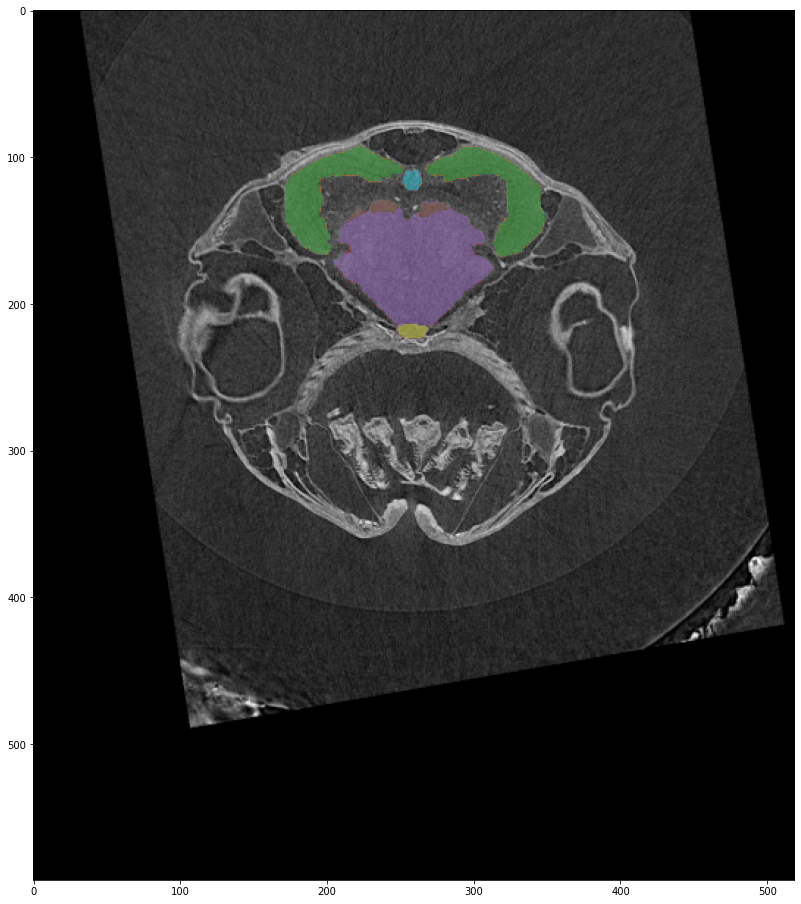

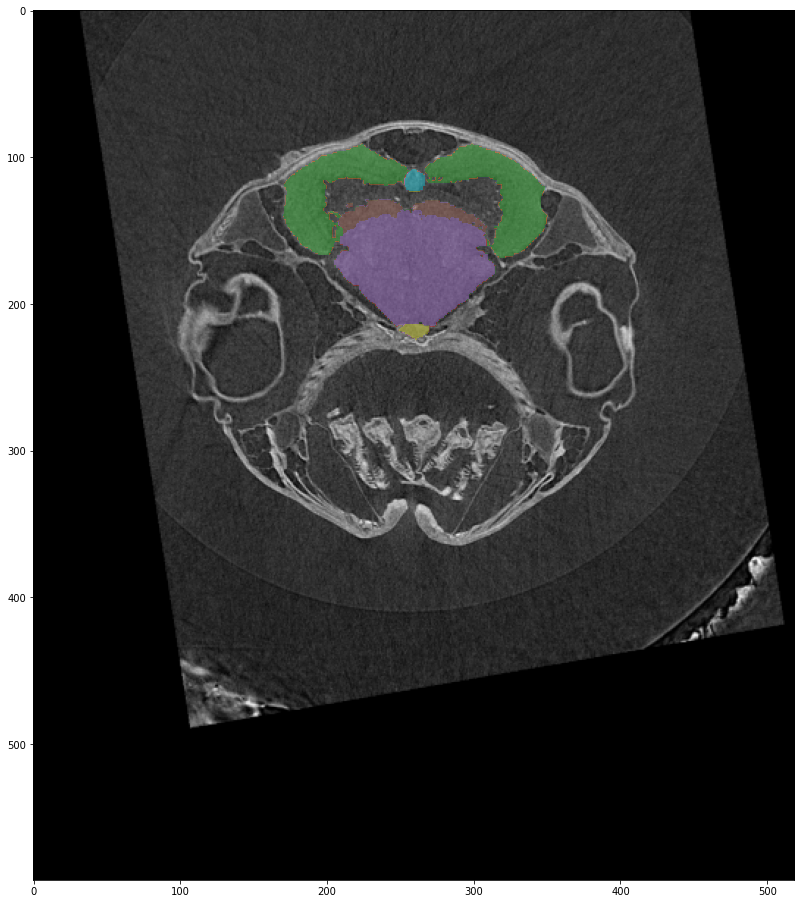

In [4]:
msk = predn
img = tifffile.imread(f'/autofs/HD-LSDF/sd20d002/segmentations/workshop/medaka_decropped/{sample_id}.tif')
ne_slc = np.where(msk.sum((1, 2))>0)[0]
print(len(ne_slc))
slice_id = ne_slc[100] # plot specific slice to compare the resutls

print(np.array(msk.shape) - np.array(img.shape))

plt.figure(figsize=(16, 16))
plt.imshow(img[slice_id], cmap='gray')
plt.imshow(msk[slice_id], cmap='tab10', alpha=(msk[slice_id]>0)*0.5)
plt.show()

msk = tifffile.imread(f'/autofs/HD-LSDF/sd20d002/segmentations/workshop/brain_decropped/01-{sample_id}.tif')
plt.figure(figsize=(16, 16))
plt.imshow(img[slice_id], cmap='gray')
plt.imshow(msk[slice_id], cmap='tab10', alpha=(msk[slice_id]>0)*0.5)
plt.show()